Phases of data modeling - Test, train, deploy
Classification model - where variable predicted (target) is categorical
ad/nonad = binary classification
classification model = "classifier"
Data involved in classification models:
inputs = features used in form of dataframe/matrix
labels - column in dataframe
entities after running classifier = predictive classes, and corresponding confidence
parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import *
from sklearn.metrics import *

### Data Modeling

Now that we have our feature set we're going to create a binary classification model to make our ad/nonad prediction. 

First, we'll split the dataset into train and test sets. The split allows us to avoid overfitting the model. We'll follow the standard a 80% train /20% test data split.

Next, we'll use the data to train and test three classifiers: Logistic Regression, Naive Bayes, and K Nearest Neighbor.

Lastly, we'll evaluate these models using Confusion matrix and ROC curve 

### Train/Test

To start, we will use pandas to import the feature set we previously created

In [2]:
#Read csv into a pandas dataframe
ad_df = pd.read_csv('InternetAd_Dataset.csv')

Then we will split the data into 1) labels - what we want to predict (in this case, ads) and 2) inputs (features) - the data used to predict the labels. 

In [3]:
#Assign 'ad' column to y
y = ad_df.ad

#Create feature set which excludes the 'ad'
X = ad_df.drop('ad', axis=1)

To easily split the dataset into a training set and testing set, we'll import the train_test_split() function from sklearn.

In [4]:
from sklearn.model_selection import train_test_split

For the train_test_split() function, we will pass the variables X and y that we obtained previously, along with test_size=0.20 which is used to indicate that the test data should be 20% of the total data and rest 80% should be train data.

In [5]:
X, XX, Y, YY = train_test_split(X, y, test_size=0.2)
#print(X_train)
#print(X_train.head())
# print(X_train.shape)
# print(X_test)
# print(X_test.head())
# print(X_test.shape)

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 

In [7]:
""" CLASSIFICATION MODELS """
# Logistic regression classifier
# print ('\n\n\nLogistic regression classifier\n')
# C_parameter = 50. / len(X) # parameter for regularization of the model
# class_parameter = 'ovr' # parameter for dealing with multiple classes
# penalty_parameter = 'l1' # parameter for the optimizer (solver) in the function
# solver_parameter = 'saga' # optimization system used
# tolerance_parameter = 0.1 # termination parameter

' CLASSIFICATION MODELS '

In [8]:
#Training the Model
clf = LogisticRegression()#C=C_parameter, multi_class=class_parameter, penalty=penalty_parameter, solver=solver_parameter, tol=tolerance_parameter)
clf.fit(X, Y) 
print ('coefficients:')
print (clf.coef_) # each row of this matrix corresponds to each one of the classes of the dataset
print ('intercept:')
print (clf.intercept_) # each element of this vector corresponds to each one of the classes of the dataset

#coefficient = importance
# Apply the Model
# print ('predictions for test set:')
# print (clf.predict(XX))
# print ('actual class values:')
# print (YY)

coefficients:
[[-0.22535907  1.00496787 -0.14021396 ...  0.07703329 -0.18354796
  -0.09214434]]
intercept:
[-2.95986493]


In [9]:
# Naive Bayes classifier
print ('\n\nNaive Bayes classifier\n')
nbc = GaussianNB() # default parameters are fine
nbc.fit(X, Y)
# print ("predictions for test set:")
# print (nbc.predict(XX))
# print ('actual class values:')
# print (YY)



Naive Bayes classifier



GaussianNB(priors=None)

In [10]:
# k Nearest Neighbors classifier
print ('\n\nK nearest neighbors classifier\n')
k = 5 # number of neighbors
distance_metric = 'euclidean'
knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
knn.fit(X, Y)
# print ("predictions for test set:")
# print (knn.predict(XX))
# print ('actual class values:')
# print (YY)



K nearest neighbors classifier



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Assess model

Classification statistics - analyze the results of a classifier
which model is more accurate?

Now that we have our classifiers we need to determine how effective a classification model is by.... In order to do that we can use two main methods: 1) Confusion Matrix and 2) ROC analysis (ROC curve)

### Confusion Matrix

For each of the classifiers above, we'll create a confusion matrix, which helps us organize a classifier's predictions in terms of how they relate with the two classes. Each class will either be - correct (positive) or incorrect (negative). 

With this we'll be able to create a matrix which includes - True Positive (TP) - data points labeled as positive that are actually positive, False Positive (FP) - data points labeled as positive that are actually negative, True Negative (TN) - data points labeled as negative that are actually negative, and False Negative (FN) - data points labeled as negative that are actually positive.

For each classifier, we'll use the confusion_matrix() function the test labels (XX) and test inputs (YY)

In [11]:
Y = (clf.predict(XX))
T = (YY)

In [12]:
#Confusion Matrix
CM = confusion_matrix(T, Y)
print ("\n\nConfusion matrix:\n", CM)
tn, fp, fn, tp = CM.ravel()
print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
AR = accuracy_score(T, Y)
print ("\nAccuracy rate:", AR)
ER = 1.0 - AR
print ("\nError rate:", ER)
P = precision_score(T, Y)
print ("\nPrecision:", np.round(P, 2))
R = recall_score(T, Y)
print ("\nRecall:", np.round(R, 2))
F1 = f1_score(T, Y)
print ("\nF1 score:", np.round(F1, 2))



Confusion matrix:
 [[551   1]
 [ 22  82]]

TP, TN, FP, FN: 82 , 551 , 1 , 22

Accuracy rate: 0.9649390243902439

Error rate: 0.03506097560975607

Precision: 0.99

Recall: 0.79

F1 score: 0.88


In [13]:
Y = (nbc.predict(XX))
T = (YY)

In [14]:
# Confusion Matrix
CM = confusion_matrix(T, Y)
print ("\n\nConfusion matrix:\n", CM)
tn, fp, fn, tp = CM.ravel()
print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
AR = accuracy_score(T, Y)
print ("\nAccuracy rate:", AR)
ER = 1.0 - AR
print ("\nError rate:", ER)
P = precision_score(T, Y)
print ("\nPrecision:", np.round(P, 2))
R = recall_score(T, Y)
print ("\nRecall:", np.round(R, 2))
F1 = f1_score(T, Y)
print ("\nF1 score:", np.round(F1, 2))



Confusion matrix:
 [[432 120]
 [ 18  86]]

TP, TN, FP, FN: 86 , 432 , 120 , 18

Accuracy rate: 0.7896341463414634

Error rate: 0.21036585365853655

Precision: 0.42

Recall: 0.83

F1 score: 0.55


In [15]:
Y = (knn.predict(XX))
T = (YY)

In [16]:
# Confusion Matrix
CM = confusion_matrix(T, Y)
print ("\n\nConfusion matrix:\n", CM)
tn, fp, fn, tp = CM.ravel()
print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
AR = accuracy_score(T, Y)
print ("\nAccuracy rate:", AR)
ER = 1.0 - AR
print ("\nError rate:", ER)
P = precision_score(T, Y)
print ("\nPrecision:", np.round(P, 2))
R = recall_score(T, Y)
print ("\nRecall:", np.round(R, 2))
F1 = f1_score(T, Y)
print ("\nF1 score:", np.round(F1, 2))



Confusion matrix:
 [[548   4]
 [ 21  83]]

TP, TN, FP, FN: 83 , 548 , 4 , 21

Accuracy rate: 0.961890243902439

Error rate: 0.038109756097560954

Precision: 0.95

Recall: 0.8

F1 score: 0.87


### ROC Analysis
We can compare the performance of a classifier against each other to see which performs better using ROC curves

In [17]:
# ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'green' # Line Color

In [29]:
preds = clf.predict_proba(XX)[:,1]
cfpr, ctpr, cth = roc_curve(T, preds) # False Positive Rate, True Posisive Rate, probability thresholds
cAUC = auc(cfpr, ctpr)

In [30]:
preds = nbc.predict_proba(XX)[:,1]
nfpr, ntpr, nth = roc_curve(T, preds) # False Positive Rate, True Posisive Rate, probability thresholds
nAUC = auc(nfpr, ntpr)
# print ("\nTP rates:", np.round(tpr, 2))
# print ("\nFP rates:", np.round(fpr, 2))
# print ("\nProbability thresholds:", np.round(th, 2))

In [31]:
preds = knn.predict_proba(XX)[:,1]
kfpr, ktpr, kth = roc_curve(T, preds) # False Positive Rate, True Posisive Rate, probability thresholds
kAUC = auc(kfpr, ktpr)

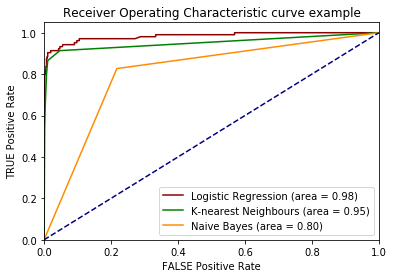

In [38]:
plt.figure()
plt.plot(cfpr, ctpr, color='darkred',lw=LW, label='Logistic Regression (area = %0.2f)' % cAUC)
plt.plot(kfpr, ktpr, color='green',lw=LW, label='K-nearest Neighbours (area = %0.2f)' % kAUC)
plt.plot(nfpr, ntpr, color='darkorange',lw=LW, label='Naive Bayes (area = %0.2f)' % nAUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.title('Receiver Operating Characteristic curve example')
plt.legend(loc=LL)
plt.show()